# Проектирование экспериментов

Каждая история болезни характеризуется следующими признаками:

* No_show — пациент не пришёл на приём;
* Gender — пол пациента;
* ScheduledDay — день, когда планируется встреча;
* AppointmentDay — реальная дата встречи;
* Age — возраст пациента;
* Neighbourhood — район проживания каждого пациента;
* Scholarship — получает ли пациент стипендию;
* …и несколько других признаков.

**Основная цель проекта** — выделить факторы, способствующие пропуску встреч с врачом. Однако это долгосрочная цель. Прежде чем копнуть глубже, необходимо попытаться ответить на следующие вопросы:

* Каково соотношение людей, которые пропускают встречи, к тем, кто этого не делает?
* Кто не появляется чаще — мужчины или женщины?

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')

Найти соотношение людей, которые пропускают приёмы, к тем, кто этого не делает, можно с помощью гистограммы:

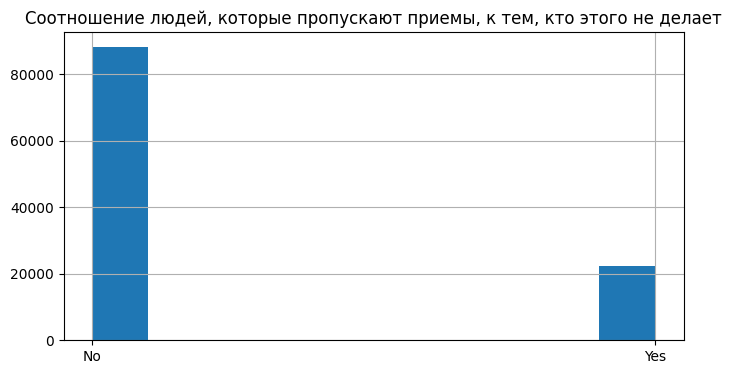

In [10]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

Или, если мы хотим получить точную пропорцию, — с помощью метода value_counts():

In [11]:
df['No-show'].value_counts(True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

Данный метод также может помочь оценить, кто не появляется чаще — мужчины или женщины:

In [12]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

Итак, мы видим, что людей, пропускающих приём, примерно 20 %.

После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. Некоторые столбцы, например ‘Gender’ и ‘Neighbourhood’, представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. Для one-hot кодировки можно воспользоваться методом get_dummies() библиотеки pandas:

In [13]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

После этих этапов можно переходить к созданию предсказания, придёт ли пациент на приём, обучению и оптимизации модели, а также выделению наиболее важных признаков, способствующих высокой производительности модели. Об этом вы узнаете в будущих модулях!  

***

### logging

Для логирования в Python используется модуль logging. Он используется большинством сторонних библиотек Python, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

Прежде чем приступить к логированию, необходимо установить базовые настройки:

* уровень;
* обработчик (хендлер);
* формат логирования. 

С импортированным модулем logging вы можете использовать так называемый «logger» для логирования сообщений, которые вы хотите видеть (вместо вывода их на экран командой print()). 

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

* отладка;
* информация;
* предупреждение;
* ошибка;
* критический. 

Самый низкий уровень из данных — не установлен, а самый высокий уровень является критическим. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [17]:
#Другой вариант сбросить настройки logging — воспользоваться функцией reload() из вспомогательной системной библиотеки importlib:

from importlib import reload
import logging
reload(logging)
#Далее, когда настройки логирования сброшены, нам необходимо перед выводом сообщений, сразу после импорта, изменить конфигурацию логгера.
logging.basicConfig(level=logging.DEBUG)

logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


**Установка формата логирования**

Как мы уже сказали, типичный формат лога выглядит так: уровень: имя: сообщение. Однако его можно изменить.

Существуют различные способы форматирования записи журнала. Вы можете включить дату, время и уровень ведения журнала в свой формат, чтобы знать, когда журнал был отправлен и на каком уровне. В приведённом ниже примере показано, как можно настроить формат записей журнала. Так как мы вновь переопределяем настройки библиотеки logging, то не забудем сбросить конфигурацию.

In [19]:
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO:root:Check


In [18]:
logging.FileHandler('logs/log_file.log')

<FileHandler e:\VS\EDA\EDA_05_Designing_experiments\logs\log_file.log (NOTSET)>

***

In [20]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [21]:
# создаем лог-файл
logger = get_logger(path="logs/", file="logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO:root:Data
INFO:root:Data shape (110527, 14)
C:\Users\user\AppData\Local\Temp\ipykernel_1992\1478402345.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO:root:Percentage of women: 0.653882342398853
C:\Users\user\AppData\Local\Temp\ipykernel_1992\1478402345.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))
INFO:root:Percentage of men: 0.346117657601147


In [22]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR:root:Data shape is incorrect!


***

### Сomet_ML

In [ ]:
from comet_ml import Experiment

experiment = Experiment(
  api_key="",
  project_name="test",
  workspace="ildar-shamaev"
)


DEBUG:everett:No INI file found: []
DEBUG:everett:No INI file found: ['./.comet.config']
DEBUG:everett:No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG:everett:No INI file found: ['~/.comet.config']
DEBUG:everett:Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:No INI file found: []
DEBUG:everett:No INI file found: ['./.comet.config']
DEBUG:everett:No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG:everett:No INI file found: ['~/.comet.config']
DEBUG:everett:Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
D

DEBUG:urllib3.connectionpool:https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG:everett:Looking up key: git_directory, namespace: ['comet']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_GIT_DIRECTORY
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_GIT_DIRECTORY
DEBUG:everett:Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_3D-PANEL': True, 'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ADMIN-DASHBOARD-DOWNLOAD-REPORTS': False, 'COMET_OVERRIDE_FEATURE_ANONYMOUS-MODE': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_AUTOGENERATED-PANELS': True, 'COMET_OVERRIDE_FEATURE_BI-USAGE-REPORT': False, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CURVES-PANEL': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-C

In [25]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : chilly_mullet_3668
COMET INFO:     url                   : https://www.comet.com/ildar-shamaev/test/2ba152f389d34f539fb5c5a44917e6de
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
DEBUG:urllib3.connectionpool:https://www.comet.com:443 "POST /clientlib/notification/experiment HTTP/1.1" 200 74
DEBUG:everett:Looking up key: sdk_announcement, namespace: ['comet', 'override_feature']
DEBUG:everett:Searching <ConfigOSEnv> for COMET